https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data  
https://www.kaggle.com/code/silfus/datsetvino


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
file='winequality-red.csv'
df = pd.read_csv(file, delimiter=',', low_memory=False)
df.shape
#os.getcwd()
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## tratamiento de la variable objetivo

In [14]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [69]:
frecuencias = df['quality'].value_counts().sort_index()
frecuencias

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['quality_class']=enc.fit_transform(df[['quality']])
df['quality_class'].unique()


array([1., 2., 0.])

In [41]:
pivot = df.pivot_table(
    values='quality',             # Variable numérica
    index='quality_class',          # Variable categórica
    aggfunc=['count', 'max', 'min'] # Funciones agregadas: conteo, máximo y mínimo
)

# Renombrar columnas para claridad
pivot.columns = ['Conteo', 'Máximo', 'Mínimo']
pivot.reset_index(inplace=True)

print(pivot)

   quality_class  Conteo  Máximo  Mínimo
0            0.0      63       4       3
1            1.0    1319       6       5
2            2.0     217       8       7


In [42]:
# Define un diccionario de mapeo
mapping = {0: 'Low', 1: 'Medium', 2: 'High'}

# Crea una nueva columna 'class_label' con las etiquetas
df['quality_class'] = df['quality_class'].map(mapping)

In [43]:
frecuencias = df['quality_class'].value_counts()
frecuencias

quality_class
Medium    1319
High       217
Low         63
Name: count, dtype: int64

In [50]:
X=df.drop(columns=['quality', 'quality_class'])
y=df['quality_class']

## train & test comprobaciones

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
valores, recuentos = np.unique(y_test, return_counts=True)

porcentajes = (recuentos / recuentos.sum()) * 100

# Creamos un DataFrame con los resultados
df_resultado = pd.DataFrame({
    'Clase': valores,
    'Frecuencia': recuentos,
    'Porcentaje': porcentajes
})

print(df_resultado)

    Clase  Frecuencia  Porcentaje
0    High          47     14.6875
1     Low          11      3.4375
2  Medium         262     81.8750


In [76]:
valores, recuentos = np.unique(y_train, return_counts=True)

porcentajes = (recuentos / recuentos.sum()) * 100

# Creamos un DataFrame con los resultados
df_resultado = pd.DataFrame({
    'Clase': valores,
    'Frecuencia': recuentos,
    'Porcentaje': porcentajes
})

print(df_resultado)

    Clase  Frecuencia  Porcentaje
0    High         170   13.291634
1     Low          52    4.065676
2  Medium        1057   82.642690


## Modelo

In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier(max_depth=4, random_state=33)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=33)

In [78]:
tree_pred = dtree.predict(X_test)
tre_proba=dtree.predict_proba(X_test)
np.unique(tree_pred, return_counts=True)

(array(['High', 'Low', 'Medium'], dtype=object), array([ 33,   1, 286]))

In [79]:
elementos_unicos, frecuencias = np.unique(y_train, return_counts=True)

print("Elementos únicos:", elementos_unicos)
print("Frecuencias:", frecuencias)

Elementos únicos: ['High' 'Low' 'Medium']
Frecuencias: [ 170   52 1057]


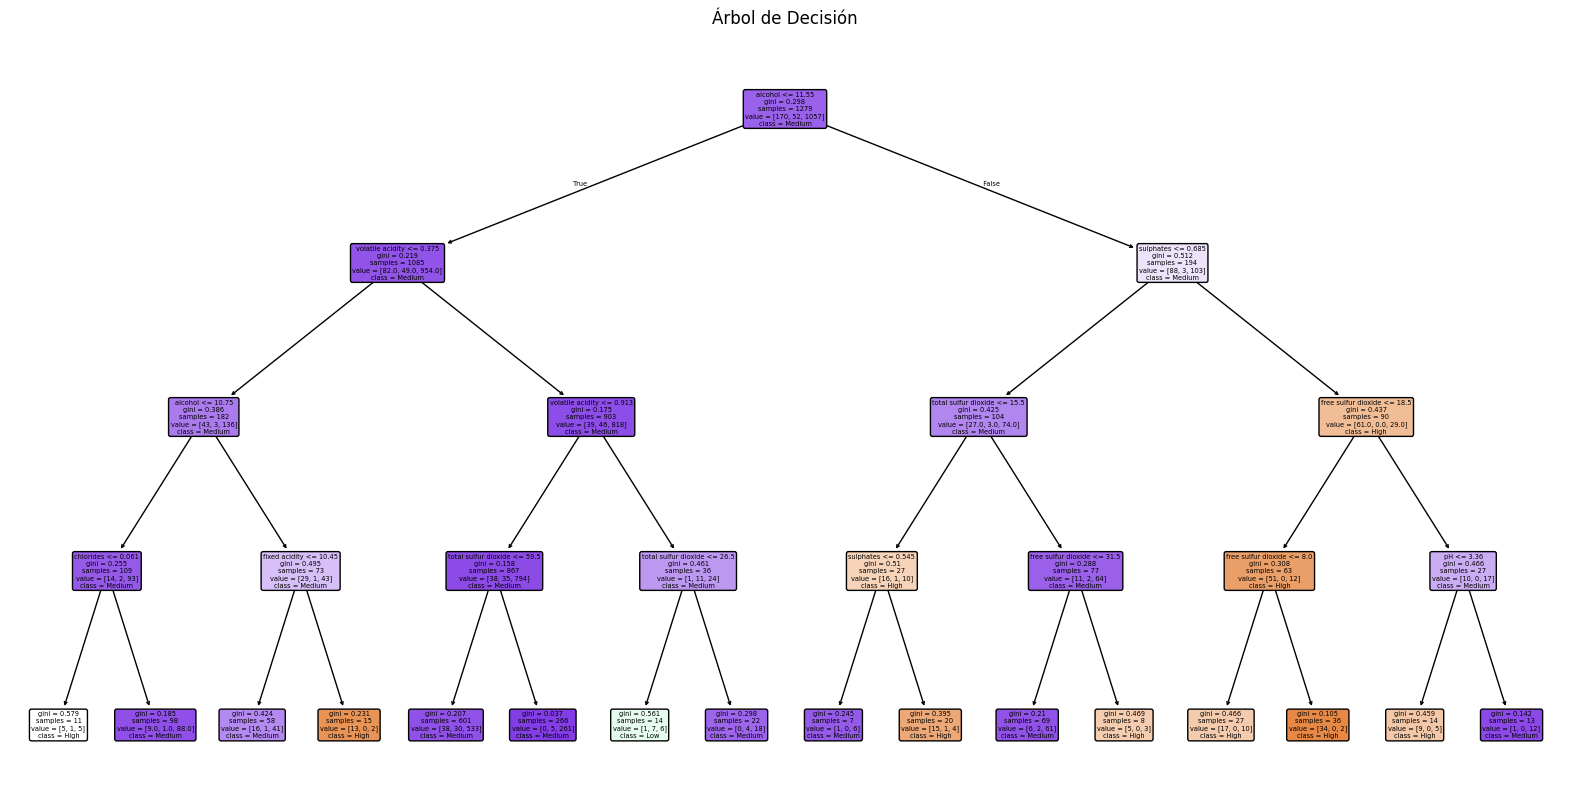

In [80]:
plt.figure(figsize=(20,10))
plot_tree(dtree,
          feature_names=X.columns,
          class_names=elementos_unicos,
          filled=True,
          rounded=True)
plt.title("Árbol de Decisión")
plt.show()

In [65]:
np.unique(tree_pred, return_counts=True)[0]

array(['High', 'Low', 'Medium'], dtype=object)

## Métricas

Accuracy: 0.83125
Matriz de Confusión:
 [[ 18   0  29]
 [  0   1  10]
 [ 15   0 247]]


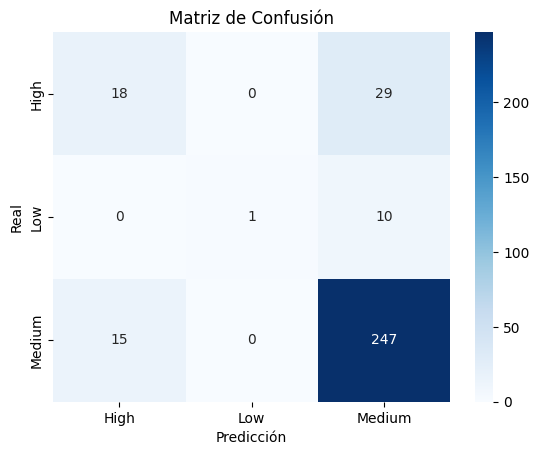

Reporte de Clasificación:
               precision    recall  f1-score   support

        High       0.55      0.38      0.45        47
         Low       1.00      0.09      0.17        11
      Medium       0.86      0.94      0.90       262

    accuracy                           0.83       320
   macro avg       0.80      0.47      0.51       320
weighted avg       0.82      0.83      0.81       320

Log Loss: 0.4484748345265738
Cohen's Kappa: 0.3329730564348028


In [81]:
# Exactitud

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, cohen_kappa_score
import numpy as np
acc = accuracy_score(y_test, tree_pred)
print("Accuracy:", acc)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, tree_pred)
print("Matriz de Confusión:\n", conf_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels= np.unique(tree_pred, return_counts=True)[0], yticklabels=np.unique(y_test, return_counts=True)[0])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


# Informe de Clasificación (Precisión, Recall, F1-score)
report = classification_report(y_test, tree_pred)
print("Reporte de Clasificación:\n", report)

# Log Loss (Pérdida Logarítmica)
loss = log_loss(y_test, tre_proba)
print("Log Loss:", loss)

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, tree_pred)
print("Cohen's Kappa:", kappa)

## Ejemplo de balanceado

In [92]:
from imblearn.over_sampling import SMOTE,SMOTEN 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Aplicar SMOTE para sobremuestrear las clases minoritarias (funciona en multiclase)
sm = SMOTE(random_state=42, sampling_strategy='all')
sm = SMOTE(random_state=42, sampling_strategy='minority')

X_res, y_res = sm.fit_resample(X_train, y_train)



In [93]:
valores, recuentos = np.unique(y_res, return_counts=True)

porcentajes = (recuentos / recuentos.sum()) * 100

# Creamos un DataFrame con los resultados
df_resultado = pd.DataFrame({
    'Clase': valores,
    'Frecuencia': recuentos,
    'Porcentaje': porcentajes
})

print(df_resultado)

    Clase  Frecuencia  Porcentaje
0    High         986   33.333333
1     Low         986   33.333333
2  Medium         986   33.333333
